# Part 1 - Data Preprocessing

**Importing the libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the training set**

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [7]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**Feauture Scaling**

In [10]:
from sklearn. preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set.shape

(1258, 1)

**Creating a data structure with 60 timesteps and 1 output**

In [16]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train. append(training_set_scaled[i-60:i, 0])
    y_train. append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

**Reshaping**

In [21]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building and Training the RNN

**Importing the Keras libraries and packages**

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**Initialising the RNN**

In [28]:
regressor = Sequential()

**Adding the first LSTM layer and some Dropout regularisation**

In [30]:
regressor. add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Adding a second LSTM layer and some Dropout regularisation**

In [40]:
regressor. add (LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

**Adding a third LSTM layer and some Dropout regularisation**

In [42]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

**Adding a fourth LSTM layer and some Dropout regularisation**

In [45]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

**Adding the output layer**

In [50]:
regressor.add(Dense(units = 1))

**Compiling the RNN**

In [52]:
regressor. compile(optimizer = 'adam', loss = 'mean_squared_error')

**Fitting the RNN to the Training set**

In [58]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0698
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0065
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0065
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0061
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0050
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0058
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0048
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0040
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0051
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0038
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - lo

In [63]:
pred=regressor.predict(X_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


**Evaluating the RNN**

In [65]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train, pred))
rmse

0.02487654292109766

# Part 3 - Making the predictions and visualising the results

**Getting the real stock price of 2017**

In [67]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

**Getting the predicted stock price of 2017**

In [69]:
dataset_total = pd. concat((dataset_train['Open'], dataset_test ['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test. append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test. shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


**Visualising the results**

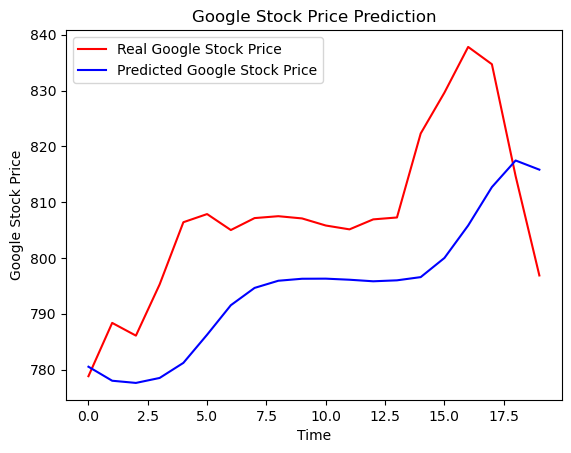

In [71]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()